<h1><center> Jane Street Puzzle </center></h1>
<h2><center> April 2024 – Robot Capture-the-Flag </center></h2>

It’s been a while and change, but the Robot Games are back once again. This time it’s Capture the Flag!

Two robots, Aaron and Erin, have made it to this year’s final! Initially they are situated at the center of a unit circle. A flag is placed somewhere inside the circle, at a location chosen uniformly at random. Once the flag is placed, Aaron is able to deduce its distance to the flag, and Erin is only able to deduce its direction to the flag. (Equivalently: if (r, θ) are the polar coordinates of the flag’s location, Aaron is told r and Erin is told θ.)

Both robots are allowed to make a single move after the flag is placed, if they wish. Any move they make is without knowledge of what the other robot is doing. (And they may not move outside the circle.)

Whichever robot is closer to the flag after these moves captures the flag and is declared the winner!

During the preliminaries it was discovered that Erin is programmed to play a fixed distance along the detected angle θ. Assuming otherwise optimal play by both robots, can you determine the probability that Aaron will win? (Please express your answer to 10 decimal places.)

### Solution
The probability of Aaron winning – knowing Erin's fixed distance $e$ to the center – is given by:
$$P(Aaron \space wins|e)= \int_{r=0}^{e/2} 1 \mathrm{d}{r} + \int_{r=e/2}^{1} \frac{4}{2\pi}arcsin(\frac{|r-e|}{2.r}) \mathrm{d}{r}$$

with:
 - $r$ the distance of th flag to the center
 - $e=argmin \space f_A(e)$ where $f_A(e)=P(Aaron \space wins|e)$, $e$ chosen by Erin to minimize Aaron probability to win

$r_{Flag} := r$

$r_{Erin} := e$

### Functions to compute probability

In [1]:
import numpy as np 
from random import random
from scipy.stats import qmc
import scipy.integrate as integrate
from scipy.optimize import minimize
from matplotlib import pyplot as plt
from matplotlib import cm
from ipywidgets import interact, VBox, HBox, fixed
import ipywidgets as widgets
from IPython.display import Javascript, display
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
def proba(r, e):
    """
    Probability of Aaron winning knowing r and e
    """
    if e/2 < r:
        rho = 2/np.pi * np.arcsin(abs(r-e)/(2*r))
    else:
        rho = 1
    
    return rho

def proba_knowing_e(e):
    return(integrate.quad(lambda r: proba(r, e=e), 0, 1)[0])


In [4]:
print("Proba of Aaron winning (for any r, any e) is ~ {}".format(round(integrate.dblquad(lambda r, e: proba(r, e), 0, 1, 0, 1)[0], 10)))

Proba of Aaron winning (for any r, any e) is ~ 0.3626851325


### Finding optimal value for e: minimizinig $f_A(e)$

$e=argmin \space f_A(e)$ where $f_A(e)=P(Aaron \space wins|e)$

Text(0.5, 1.0, 'P(A|e) = P_A(e)\nOptimal value for e is ~ 0.1829478635')

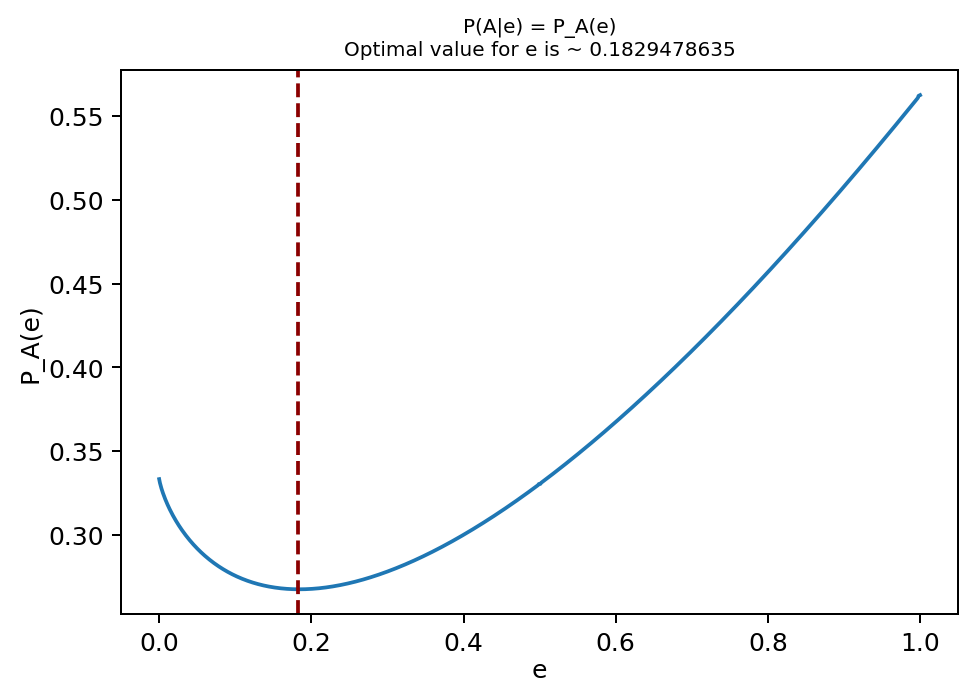

In [5]:
n = 1000
P = []
es = np.arange(0, 1+1/n, 1/n)
for e in es:
    P.append(proba_knowing_e(e))

plt.figure(dpi=180)
plt.plot(np.arange(0, 1+1/n, 1/n), P)
plt.xlabel('e', fontsize=10, rotation=0, labelpad=1)
plt.ylabel('P_A(e)', fontsize=10, rotation=90, labelpad=2)

e_optimal = minimize(proba_knowing_e, 0.19, method='SLSQP', tol=1e-20).x[0]
plt.axvline(x=e_optimal, ls="--", color="darkred")

plt.title("P(A|e) = P_A(e)\nOptimal value for e is ~ {}".format(round(e_optimal, 10)),
             fontsize=8)

### Solution

In [6]:
print("P(A|e=e_optimal) is ~ {}".format(round(proba_knowing_e(e_optimal), 10)))

P(A|e=e_optimal) is ~ 0.2675528805


### Interactive plot of positions to win

In [7]:
def plot_robot_flag(r_flag, r_erin, digits=10):
    """
    Plots the winning area and Aaron's position to win, depending on to flag's distance to the center r_flag,
    and the distance of Erin to the center r_erin.
    Also displays the probability of Aaron winning, with n digits.
    
    Parameters:
    r_flag: flag's distance to the center
    r_erin: Erin's distance to the center
    digits: number of digits to display probability
    
    """
    
    plt.ioff() #disable automatic redrawing of the plot
    
    # Dsitance of Erin to the flag
    d0 = abs(r_flag - r_erin)
    
    # Circle patches
    #circle_unit = plt.Circle((0, 0), 1, color='black', alpha=1, fill=False)
    #circle_aaron = plt.Circle((0, 0), r_flag, color='darkred', alpha=0.5, fill=False)
    circle_erin = plt.Circle((r_flag, 0), d0, color='blue', alpha=0.2)
    
    
    # Unit circle
    angles = np.linspace(0, 2 * np.pi, 50)
    xs = np.cos(angles)
    ys = np.sin(angles)
    
    # Winning area around the flag
    angles = np.linspace(0, 2 * np.pi, 50)
    win_xs = d0 * np.cos(angles) + r_flag
    win_ys = d0 * np.sin(angles)
    
    # Position of Aaron to win
    if r_erin>2*r_flag:
        alpha = 2 * np.pi
        ratio = 1
    else:
        alpha = 4 * np.arcsin(d0/(2*r_flag))
        ratio = alpha/(2*np.pi)
    
    arc_angles = np.linspace(-alpha/2, alpha/2, int(100*ratio))
    arc_xs = r_flag * np.cos(arc_angles)
    arc_ys = r_flag * np.sin(arc_angles)
    
    # Other position of Aaron
    angles = np.linspace(alpha/2, 2 * np.pi - alpha/2, int(100*(1-ratio)))
    aaron_xs = r_flag * np.cos(angles)
    aaron_ys = r_flag * np.sin(angles)
    
    
    # ##################
    # ##################
    plt.ion() #re-enable automatic redrawing of the plot
    
    # Plotting:
    fig, ax = plt.subplots(dpi=180)
    #fig.figsize=(150, 150)
    
    # Plot Unit circle
    plt.plot(xs, ys, color = 'black', lw = 0.5)
    
    # Plot initial position
    plt.scatter([0], [0], marker="+", color="black")
    
    # Plot winning area
    plt.plot(win_xs, win_ys, color = 'blue', lw = 0.5)
    
    # Plot Erin's position
    plt.scatter([r_flag], [0], marker="x", color="black")
    
    # Plot Aaron position
    
    if r_flag < r_erin/2:
        # don't move
        plt.scatter([0], [0], marker="x", color="red")
        plt.scatter(arc_xs, arc_ys, color = 'red', s = 0.5, marker=".")
    else:
        # Plot Aaron position to win
        plt.plot(arc_xs, arc_ys, color = 'red', lw = 2)
    
    plt.scatter(aaron_xs, aaron_ys, color = 'red', s = 0.5, marker=".")
    ax.add_patch(circle_erin)
    
    # Plot Erin's position
    plt.scatter([r_erin], [0], marker="x", color="blue")

    
    ax.set_aspect('equal')
    ax.set_xlim((-1.2, 1.2))
    ax.set_ylim((-1.2, 1.2))
    ax.tick_params(axis='x', labelrotation=0, pad=1, labelsize=6)
    ax.tick_params(axis='y', labelrotation=0, pad=1, labelsize=6)
    
    plt.suptitle("Probability of Aaron winning\n P(Aaron wins | r_flag={}, r_Erin={}) = {}".format(r_flag, r_erin, round(ratio, digits)),
                fontsize=8)
    plt.grid()

In [8]:
# Widgets of the parameters
r_flag_widget = widgets.FloatSlider(min=0, max=1, step=0.01, value=0.7)
r_erin_widget = widgets.FloatSlider(min=0, max=1, step=0.01, value=0.38)
proba_rounding = widgets.IntSlider(min=0, max=10, step=1, value=3)

The flag is at the black cross.

Erin is at the blue cross.

Aaron is on the red circle.

Aaron wins if it is in the blue circle, centred of the flag and with radius the distance of Erin to the flag.

In [9]:
interact(plot_robot_flag, r_flag=r_flag_widget, r_erin=r_erin_widget, digits=proba_rounding)

interactive(children=(FloatSlider(value=0.7, description='r_flag', max=1.0, step=0.01), FloatSlider(value=0.38…

<function __main__.plot_robot_flag(r_flag, r_erin, digits=10)>

### Function to plot the distribution of Aaron probability of winning

In [10]:
def robot_flag_distribution(n):
    """
    Generates the probability surface rho
    Returne (X, Y, rho): Y = r_flag, X = r_Erin
    Precision is n: distance of a move is a multiple of (1/n), adjust n to modify the precision.
    
    Erin: θ
    Aaron: r
    """

    rho = []
    
    # distance of the flag to center
    for r in np.arange(0, 1+1/n, 1/n):
        # distance of Erin to center
        for e in np.arange(0, 1+1/n, 1/n):
            rho.append(proba(r, e))
    
    rho = np.reshape(rho, (n+1, n+1))

    X = np.arange(0, 1+1/n, 1/n) # r_flag
    Y = np.arange(0, 1+1/n, 1/n) # r_Erin
    
    return (X, Y, rho)


def plot_3D(X, Y, rho, digits=3, azimuth=25, elevation=35):
    """
    Plots the distribution (X, Y, rho)
    Adjust the Azimuth and elevation
    """
    n = len(Y) - 1
    Y_copy = X.copy()
    X, Y = np.meshgrid(X, Y)
    fig = plt.figure(dpi=180)
    ax = fig.add_subplot(111, projection='3d')
    
    mycmap = plt.get_cmap('jet')

    Aaron_knowin_Erin = [np.sum([row[i]*1/n for row in rho]) for i in range(len(rho))]
    r_erin = Aaron_knowin_Erin.index(min(Aaron_knowin_Erin))

    ax.plot_surface(X, Y, rho, rstride=1, cstride=1, alpha=.5, cmap=mycmap)

    ax.plot(xs=X[:, r_erin],
            ys = Y,
            zs = [row[r_erin] for row in rho],
            lw=1, c="r")
    
    # ax.plot_wireframe(X, Y, rho, rstride=1, cstride=1, alpha=0.9, cmap=cm.coolwarm)

    #cset = ax.contour(X, Y, rho, zdir='x', offset=x, cmap=mycmap, alpha=0.5)
    #cset = ax.contour(X, Y, rho, zdir='y', offset=y-1, cmap=mycmap, alpha=0.5)
    
    ax.tick_params(axis='x', labelrotation=0, pad=1, labelsize=6)

    ax.tick_params(axis='y', labelrotation=0, pad=1, labelsize=6)
    
    ax.tick_params(axis='z', labelrotation=0, pad=1, labelsize=6)

    ax.set_xlabel('r_Erin', fontsize=6, rotation=20, labelpad=1)

    ax.set_ylabel('r_Flag', fontsize=6, rotation=-20, labelpad=1)

    ax.set_zlabel('P', fontsize=6, rotation=0, labelpad=1)

    integral = integrate.dblquad(lambda r, e: proba(r, e), 0, 1, 0, 1)[0]
    
    plt.title("Probability distribution surface\nP(Aaron wins | r_flag, r_Erin), Integral: {}\n".format(round(integral, digits)),
             fontsize=8)

    ax.view_init(azimuth, elevation) 
    
    plt.show()
    


<h3><center> Plot of the distribution </center></h3>

### Select precision parameters

In [11]:
# Widgets of the parameters
n_widget = widgets.IntSlider(description="n", min=10, max=100, step=10, value=100)
digits_widget = widgets.IntSlider(description="digits", min=1, max=10, step=1, value=5)

In [12]:
left_box = VBox([n_widget])
right_box = VBox([digits_widget])
HBox([left_box, right_box])

n: distance of a move is a multiple of (1/n), adjust n to modify the precision.

digits: number of digits to display the integral value

Re-run below cells to update n and digits

In [13]:
X, Y, rho = robot_flag_distribution(n=n_widget.value)

In [14]:
azimuth_widget = widgets.IntSlider(description="Azimuth", min=0, max=360, step=1, value=15)
elevation_widget = widgets.IntSlider(description="Elevation", min=0, max=360, step=1, value=40)

In [15]:
interact(plot_3D, X=fixed(X), Y=fixed(Y), rho=fixed(rho), digits=fixed(digits_widget.value), azimuth=azimuth_widget, elevation=elevation_widget)

interactive(children=(IntSlider(value=15, description='Azimuth', max=360), IntSlider(value=40, description='El…

<function __main__.plot_3D(X, Y, rho, digits=3, azimuth=25, elevation=35)>

Text(0.5, 1.0, 'P(A|r, e=e_optimal) = P_A,e(r)\ne ~ 0.1829478635')

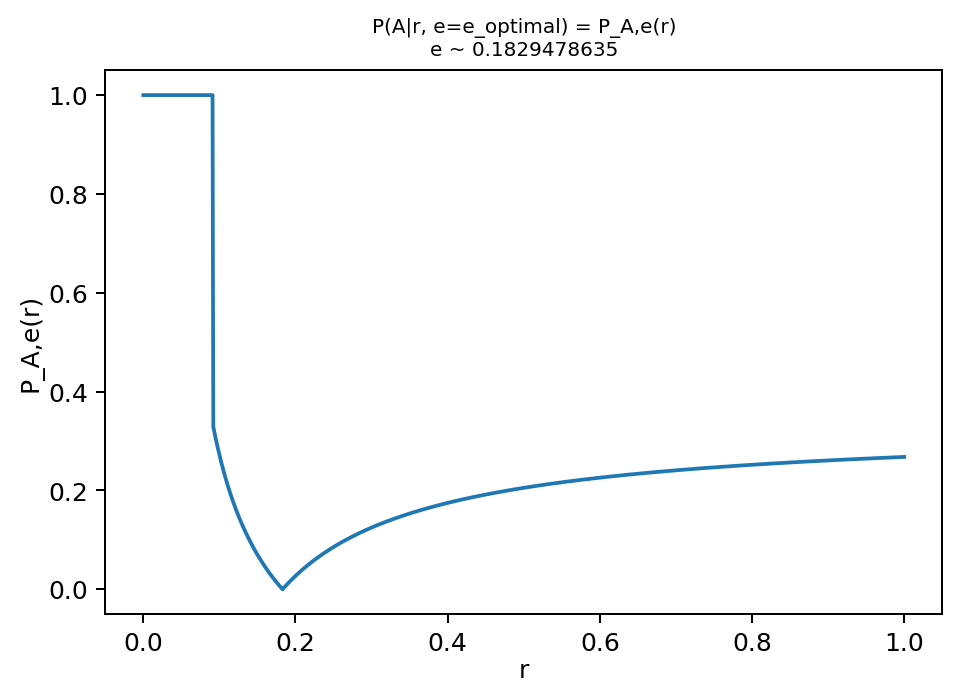

In [16]:
n = 1000
P = []
rs = np.arange(0, 1+1/n, 1/n)
for r in rs:
    P.append(proba(r, e=e_optimal))

plt.figure(dpi=180)
plt.plot(np.arange(0, 1+1/n, 1/n), P)
plt.xlabel('r', fontsize=10, rotation=0, labelpad=1)
plt.ylabel('P_A,e(r)', fontsize=10, rotation=90, labelpad=2)

plt.title("P(A|r, e=e_optimal) = P_A,e(r)\ne ~ {}".format(round(e_optimal, 10)),
             fontsize=8)